In [1]:
!pip install ethicml==0.2.2 -q

# TASK 1 (STANDARD MODEL - ADULT DATASET)
###Using LOGSTIC REGRESSION

In [27]:
# Task 1 reworking with ethhicml
import ethicml as em
import json
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = em.crime(split="Race-Binary")
data = dataset.load()
train, test = em.train_test_split(data, train_percentage=0.7)

#Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
scale_orig = MinMaxScaler()
train.x[dataset.continuous_features] = scale_orig.fit_transform(train.x[dataset.continuous_features])
test.x[dataset.continuous_features] = scale_orig.transform(test.x[dataset.continuous_features])

C_arr = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
hyperparams = {"C": C_arr}

In [4]:
data.x.isnull().sum()

population       0
householdsize    0
agePct12t21      0
agePct12t29      0
agePct16t24      0
                ..
state_51         0
state_53         0
state_54         0
state_55         0
state_56         0
Length: 136, dtype: int64

In [5]:
# Below we see that the dataset features have been adequately preprocessed. This mean that 
len(dataset.discrete_features)+len(dataset.continuous_features), len(data.x.columns)

(136, 136)

In [6]:
print(data.x.shape)
data.x.head()

(1993, 136)


,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,state_46,state_47,state_48,state_49,state_50,state_51,state_53,state_54,state_55,state_56
0,0.01,0.58,0.34,0.58,0.36,0.39,0.02,1.0,0.45,0.70,...,0,0,0,0,0,0,0,0,0,0
1,0.06,0.34,0.40,0.46,0.28,0.38,0.08,1.0,0.27,0.60,...,0,0,0,0,0,0,0,0,0,1
2,0.05,0.35,0.38,0.51,0.33,0.41,0.07,1.0,0.23,0.59,...,0,0,0,0,0,0,0,0,0,0
3,0.01,0.89,0.52,0.56,0.40,0.34,0.02,1.0,0.41,0.60,...,0,0,0,0,0,0,0,0,0,0
4,0.12,0.44,0.90,0.91,0.92,0.28,0.13,1.0,0.16,0.63,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.x.columns

Index(['population', 'householdsize', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage',
       ...
       'state_46', 'state_47', 'state_48', 'state_49', 'state_50', 'state_51',
       'state_53', 'state_54', 'state_55', 'state_56'],
      dtype='object', length=136)

In [8]:
data.s

,>0.06black
0,1
1,0
2,1
3,0
4,1
...,...
1988,0
1989,1
1990,1
1991,0


In [9]:
data.s.value_counts()

>0.06black
0             1023
1              970
dtype: int64

In [10]:
data.y.head()

,high_crime
0,0
1,0
2,0
3,1
4,1


In [11]:
data.y.value_counts()

high_crime
0             1340
1              653
dtype: int64

In [12]:
# Our custom functions 

# Extract training metrics
def acc_fair_extraction(payload):
  accs = []
  fairness = []
  for i,j in payload.items():
    accs.append(j[2]["Accuracy"])
    fairness.append(j[2]["CV absolute"])
  return(accs, fairness)


# Plot Result
def plot_acc_fairness(acc_s, fair_s, C_arr):
  y = np.array(acc_s)
  plt.plot(y, label="Accuracy")

  y2 = np.array(fair_s)
  plt.plot(y2, label="Fairness Metric")
  x_arr = [str(i) for i in C_arr]
  x = np.array(C_arr)
  plt.xlabel("C")
  plt.ylabel("Performance")
  plt.xticks([0,1,2,3,4,5,6], x_arr)
  plt.legend()
  plt.show()


def higheset_model_metric(metric, payload): #input metric "Accuracy" for accuracy and "CV absolute" for fairness
  c, score = 0, 0
  result = {}
  for C, results in payload.items():
    if score <= results[2][metric]:
      c = results[0]['C']
      score = results[2][metric]
      result["Accuracy"] = results[2]["Accuracy"]
      result["CV absolute"] = results[2]["CV absolute"]
  return (c, result)

fold: 0, model: 'Logistic Regression (C=100)', Accuracy=0.8423, CV absolute=0.565, completed!
fold: 0, model: 'Logistic Regression (C=10)', Accuracy=0.8566, CV absolute=0.5507, completed!
fold: 0, model: 'Logistic Regression (C=1)', Accuracy=0.8495, CV absolute=0.6365, completed!
fold: 0, model: 'Logistic Regression (C=0.1)', Accuracy=0.8172, CV absolute=0.7007, completed!
fold: 0, model: 'Logistic Regression (C=0.01)', Accuracy=0.7778, CV absolute=0.822, completed!
fold: 0, model: 'Logistic Regression (C=0.001)', Accuracy=0.6452, CV absolute=1, completed!
fold: 0, model: 'Logistic Regression (C=0.0001)', Accuracy=0.6452, CV absolute=1, completed!
fold: 1, model: 'Logistic Regression (C=100)', Accuracy=0.8638, CV absolute=0.6155, completed!
fold: 1, model: 'Logistic Regression (C=10)', Accuracy=0.8781, CV absolute=0.6578, completed!
fold: 1, model: 'Logistic Regression (C=1)', Accuracy=0.871, CV absolute=0.7295, completed!
fold: 1, model: 'Logistic Regression (C=0.1)', Accuracy=0.8495,

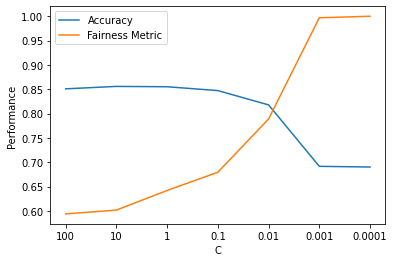

In [13]:
cv = em.CrossValidator(em.LR, hyperparams, folds=5)
primary = em.Accuracy()
fair_measure = em.AbsCV()
cv_results_1 = cv.run(train, measures=[primary, fair_measure])
best_result = cv_results_1.get_best_in_top_k(primary, fair_measure, top_k=5)

print(f"Best C: {best_result.params['C']}")
print(f"Best Accuracy: {best_result.scores['Accuracy']}")
print(f"Best CV Score: {best_result.scores['CV absolute']}")
print(cv_results_1.mean_storage)
print(cv_results_1.raw_storage)

acc_s, fair_s = acc_fair_extraction(cv_results_1.mean_storage)
plot_acc_fairness(acc_s, fair_s, C_arr)

In [14]:
print(higheset_model_metric("CV absolute", cv_results_1.mean_storage))

(0.0001, {'Accuracy': 0.6903225806451613, 'CV absolute': 1.0})


In [15]:
m1_acc = higheset_model_metric(
    "Accuracy", 
    cv_results_1.mean_storage
    )
print(f"Highest Accuracy Model (1) \nC: {m1_acc[0]}")
print(f"Training Acc: {m1_acc[1]['Accuracy']}")
print(f"CV absolute: {m1_acc[1]['CV absolute']}\n")
# Test the higest ACCURACY Model on the Test Set
learner = em.LR(C=m1_acc[0])
predictions = learner.run(train, test)
print("Test Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Highest Accuracy Model (1) 
C: 10
Training Acc: 0.8559139784946237
CV absolute: 0.6018598699281918

Test Accuracy 0.8311036789297659
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.2952020202020202}}


In [16]:
m2_acc = higheset_model_metric(
    "CV absolute", 
    cv_results_1.mean_storage
    )
print(f"Highest Accuracy Model (2) \nC: {m2_acc[0]}")
print(f"Training Acc: {m2_acc[1]['Accuracy']}")
print(f"CV absolute: {m2_acc[1]['CV absolute']}\n")
# Test the higest FAIRNESS on the Test Set
# Highest FAIRNESS Model C = 0.0001 Training Accuracy = 0.8006192182755117, Fairness Metric = 0.936600078520044
# The equivalent of the above, but in just EthicML
learner = em.LR(C=m2_acc[0])
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Highest Accuracy Model (2) 
C: 0.0001
Training Acc: 0.6903225806451613
CV absolute: 1.0

Accuracy 0.6304347826086957
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.0}}


# TASK 2 (FAIRNESS MODEL)
###Using Reweighing

fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8387, CV absolute=0.6294, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8351, CV absolute=0.651, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8315, CV absolute=0.7439, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8172, CV absolute=0.7724, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.7419, CV absolute=0.8791, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.6452, CV absolute=1, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.6452, CV absolute=1, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8244, CV absolute=0.7654, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8387, CV absolute=0.8218, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8387, CV absolute=0.7926, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8387, CV absolute=0.7642, completed!
fold: 1, model: 'Kamiran & Calders LR', Acc

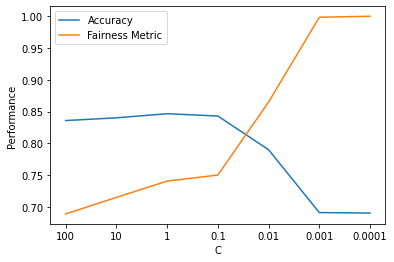

In [17]:
# Task 2 reweighing
cv = em.CrossValidator(em.Kamiran, hyperparams, folds=5)
primary = em.Accuracy()
fair_measure = em.AbsCV()
cv_results_2 = cv.run(train, measures=[primary, fair_measure])
best_result = cv_results_2.get_best_in_top_k(primary, fair_measure, top_k=5)

print(f"Best C: {best_result.params['C']}")
print(f"Best Accuracy: {best_result.scores['Accuracy']}")
print(f"Best CV Score: {best_result.scores['CV absolute']}")
print(cv_results_2.mean_storage)
print(cv_results_2.raw_storage)

acc_s, fair_s = acc_fair_extraction(cv_results_2.mean_storage)
plot_acc_fairness(acc_s, fair_s, C_arr)

In [18]:
m3_acc = higheset_model_metric(
    "Accuracy", 
    cv_results_2.mean_storage
    )
print(f"Highest Accuracy Model (3) \nC: {m3_acc[0]}")
print(f"Training Acc: {m3_acc[1]['Accuracy']}")
print(f"CV absolute: {m3_acc[1]['CV absolute']}\n")
# Test the higest ACCURACY Model on the Test Set
learner = em.Kamiran(C=m3_acc[0])
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Highest Accuracy Model (3) 
C: 1
Training Acc: 0.8465949820788531
CV absolute: 0.7405948381296561

Accuracy 0.8244147157190636
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.06527777777777777}}


In [19]:
m4_acc = higheset_model_metric(
    "CV absolute", 
    cv_results_2.mean_storage
    )
print(f"Highest Accuracy Model (3) \nC: {m4_acc[0]}")
print(f"Training Acc: {m4_acc[1]['Accuracy']}")
print(f"CV absolute: {m4_acc[1]['CV absolute']}\n")
# Test the higest FAIRNESS on the Test Set
learner = em.Kamiran(C=m4_acc[0])
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Highest Accuracy Model (3) 
C: 0.0001
Training Acc: 0.6903225806451613
CV absolute: 1.0

Accuracy 0.6304347826086957
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.0}}


# Task 3 (Extra): Model Selection Strategy
### Using my custom Accuracy-Fairness Metric Score

### Formular:

*   score% = Tanh(Tanh$^{-1}$Accuracy * Tanh$^{-1}$|Fairness|) * 100

*   score% = Tanh(Tanh$^{-1}$Accuracy * Tanh$^{-1}$|1-Equal opportunity difference|) * 100



In [20]:
def model_strategy_metric(payload):
  C = []
  scores = []
  for results in payload.values():
    C.append(results[0]['C'])
    acc = results[2]["Accuracy"]
    fair = results[2]["CV absolute"]
    scores.append(np.tanh(np.arctanh(acc)*np.arctanh(fair)))
  return C, scores


def show_cal_results(C, scores):
  for i in range(len(C)):
    print(f"C:{C[i]} = {scores[i]}")


def acc_fair_extraction(payload):
  accs = []
  fairness = []
  for i,j in payload.items():
    accs.append(j[2]["Accuracy"])
    fairness.append(j[2]["CV absolute"])
  return(accs, fairness)


def plot_ccr(C_arr, acc_s, fair_s, scores):
  y = np.array(acc_s)
  plt.plot(y, label="Accuracy")

  y2 = np.array(fair_s)
  plt.plot(y2, label="Fairness Metric")

  y2 = np.array(scores)
  plt.plot(y2, label="New Criteria score")
  
  x_arr = [str(i) for i in C_arr]
  x = np.array(C_arr)
  plt.xlabel("C")
  plt.ylabel("Performance")
  plt.xticks([0,1,2,3,4,5,6], x_arr)
  plt.legend()
  plt.show()


def new_metric(C, scores):
  score = 0
  for i in range(len(C)):
    if score <= scores[i]:
      c = C[i]
      score = scores[i]
  return [c, score]

ACCURACY-FAIRNESS CRITERIA SCORE FOR STANDARD MODEL
C:100 = 0.69688887780637
C:10 = 0.7111297775037903
C:1 = 0.7493602201952184
C:0.1 = 0.7749858246394838
C:0.01 = 0.8424152059328011
C:0.001 = 0.9918444444235337
C:0.0001 = 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in arctanh
  


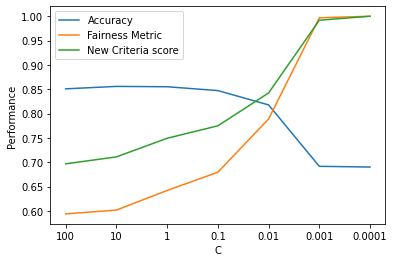

In [21]:
# Model Selection Strategy on the Standard Model 1 and 2

# loading the 5 fold cross validation results of the STANDARD Model
print("ACCURACY-FAIRNESS CRITERIA SCORE FOR STANDARD MODEL")
standard_model_result = cv_results_1.mean_storage
C, scores = model_strategy_metric(standard_model_result)
show_cal_results(C, scores)
a, f = acc_fair_extraction(standard_model_result)
plot_ccr(C, a, f, scores)

In [29]:
print("FOR THE STANDARD MODEL (5) - BASED OFF THE NEW CRITERIA SCORE")
print(f"THE BEST ACCURACY-FAIRNESS MODEL \nC= {new_metric(C, scores)[0]} & Score {new_metric(C, scores)[1]*100}\n")
print("TEST SCORE FOR SELECTED STANDARD MODEL - BASED OFF NEW CRITERIA SCORE")
# Test the higest FAIRNESS on the Test Set
learner = em.LR(C=new_metric(C, scores)[0])
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)
print(f"TEST ACCURACY-FAIRNESS SCORE = {np.tanh(np.arctanh(em.Accuracy().score(predictions, test))*np.arctanh((1-em.diff_per_sensitive_attribute(tpr_per_sens)['>0.06black_0->0.06black_1'])))*100}%")

FOR THE STANDARD MODEL (5) - BASED OFF THE NEW CRITERIA SCORE
THE BEST ACCURACY-FAIRNESS MODEL 
C= 0.0001 & Score 100.0

TEST SCORE FOR SELECTED STANDARD MODEL - BASED OFF NEW CRITERIA SCORE
Accuracy 0.6304347826086957
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.0}}
TEST ACCURACY-FAIRNESS SCORE = 100.0%


C:100 = 0.770354220499803
C:10 = 0.7990806395861255
C:1 = 0.8287218134935155
C:0.1 = 0.8332028593616942
C:0.01 = 0.8866751886033939
C:0.001 = 0.9952786942027297
C:0.0001 = 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in arctanh
  


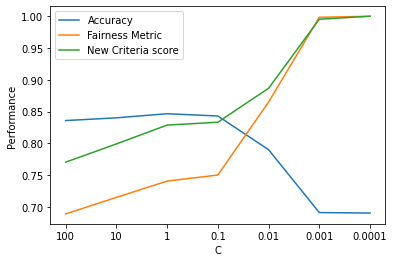

In [23]:
# loading the 5 fold cross validation results of the FAIRNESS-BASED Model
fairness_model_results = cv_results_2.mean_storage
C_2, scores_2 = model_strategy_metric(fairness_model_results)
show_cal_results(C_2, scores_2)
a_2, f_2 = acc_fair_extraction(fairness_model_results)
plot_ccr(C_2, a_2, f_2, scores_2)

In [28]:
warnings.filterwarnings('ignore')
print("FOR THE FAIRNESS MODEL (6) - BASED OFF THE NEW CRITERIA SCORE")
print(f"THE BEST ACCURACY-FAIRNESS MODEL \nC= {new_metric(C_2, scores_2)[0]} & Score {new_metric(C_2, scores_2)[1]*100}\n")
print("TEST SCORE FOR FAIRNESS MODEL - BASED OFF NEW CRITERIA SCORE")
learner = em.Kamiran(C=new_metric(C_2, scores_2)[0])
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)
print(f"TEST ACCURACY-FAIRNESS SCORE = {np.tanh(np.arctanh(em.Accuracy().score(predictions, test))*np.arctanh((1-em.diff_per_sensitive_attribute(tpr_per_sens)['>0.06black_0->0.06black_1'])))*100}%")

FOR THE FAIRNESS MODEL (6) - BASED OFF THE NEW CRITERIA SCORE
THE BEST ACCURACY-FAIRNESS MODEL 
C= 0.0001 & Score 100.0

TEST SCORE FOR FAIRNESS MODEL - BASED OFF NEW CRITERIA SCORE
Accuracy 0.6304347826086957
{'eq_opp_diff': {'>0.06black_0->0.06black_1': 0.0}}
TEST ACCURACY-FAIRNESS SCORE = 100.0%
